 🧩 Step 1: Import Required Libraries

We begin by importing all necessary Python libraries for data processing, numerical analysis, and visualization.  
These tools help us handle the raw Met Data, perform quality checks, and generate insights.

- **pandas** and **numpy** — for data manipulation and numerical operations  
- **scipy.stats** — for statistical computations (Z-score outlier detection)  
- **matplotlib** and **seaborn** — for plotting and visualization  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import zscore
import matplotlib.dates as mdates

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

## 📥 Step 2: Load the Dataset

We load the Togo solar radiation dataset into a pandas DataFrame.
The dataset contains key environmental measurements such as irradiance, temperature, humidity, and wind readings.


In [2]:
df = pd.read_csv("../data/raw/togo-dapaong_qc.csv", parse_dates=["Timestamp"])
df = df.sort_values("Timestamp").reset_index(drop=True)
print("Data loaded successfully:", df.shape)
display(df.head())

Data loaded successfully: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


## 🧾 Step 3: Data Profiling

We examine the dataset’s structure, column types, and summary statistics to understand its content and quality.
This includes:
- Dataset shape  
- Column data types  
- Missing values  
- Basic statistics (mean, std, min, max)

Dataset shape: (525600, 19)

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cle

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN



Missing values per column:


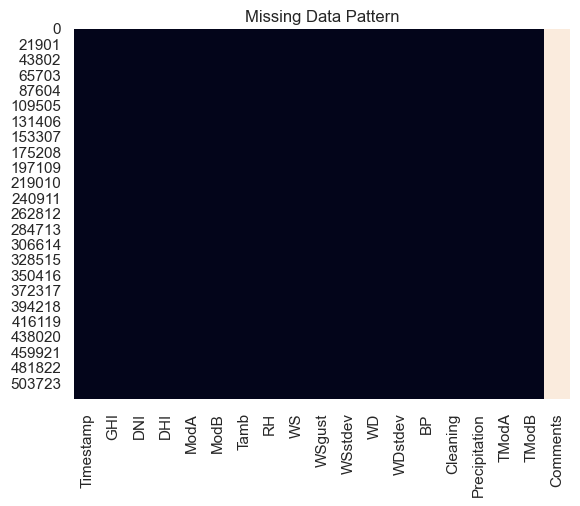

In [3]:
print("Dataset shape:", df.shape)
print("\nColumn information:")
df.info()

print("\nSummary statistics:")
display(df.describe())

print("\nMissing values per column:")
df.isna().sum()

sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Data Pattern")
plt.show()


## 🧹 Step 4: Data Cleaning — Handling Missing Values & Outliers

In this step, we:
1. Fill missing numeric values with the column median.  
2. Detect outliers using Z-scores (values where |Z| > 3).  
3. Remove rows with extreme outliers to ensure data reliability.

In [4]:
# Fill missing numeric values with median
df = df.fillna(df.median(numeric_only=True))

# Detect outliers
numeric_cols = df.select_dtypes(include=np.number).columns
z_scores = np.abs(zscore(df[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)

#before
print("Before cleaning:", df.shape)
# Remove outliers
df_clean = df[~outliers]
#after
print("After cleaning:", df_clean.shape)
print(f"Removed {outliers.sum()} outliers. Clean dataset shape: {df_clean.shape}")


Before cleaning: (525600, 19)
After cleaning: (505422, 19)
Removed 20178 outliers. Clean dataset shape: (505422, 19)


## ☀️ Step 5: Time Series Analysis

We visualize solar radiation variables over time to observe daily and seasonal patterns.
Key metrics include:
- **GHI** (Global Horizontal Irradiance)
- **DNI** (Direct Normal Irradiance)
- **DHI** (Diffuse Horizontal Irradiance)
- **Tamb** (Ambient Temperature)


C:\Users\YODAHE\AppData\Local\Temp\ipykernel_6016\4255656715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])


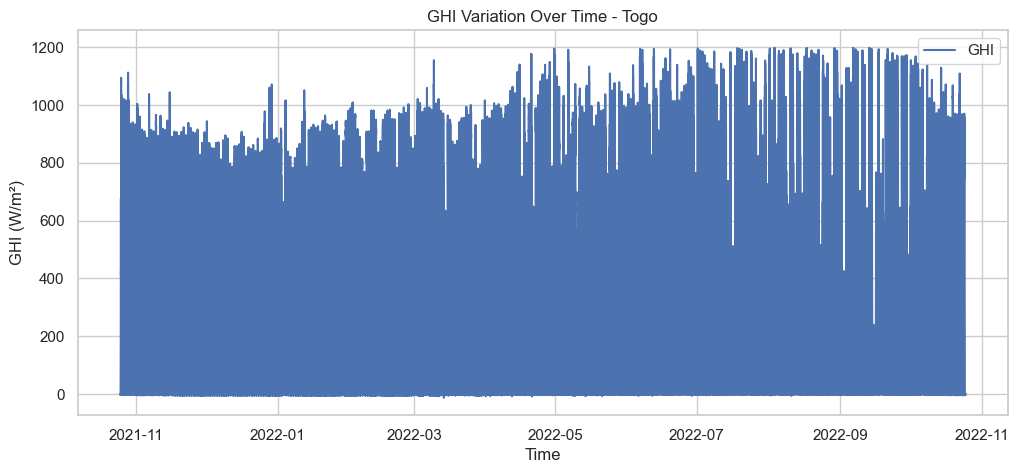

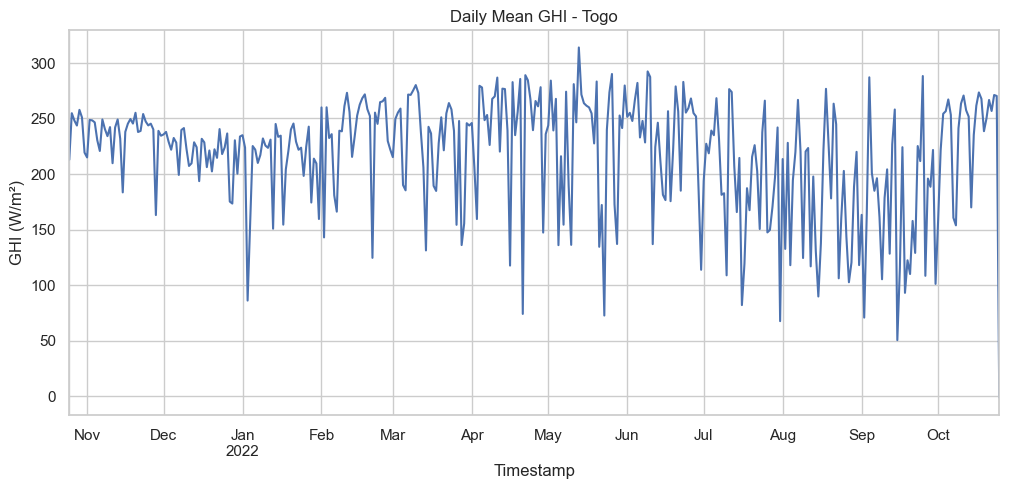

In [5]:
# Convert timestamp to datetime
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

plt.figure(figsize=(12, 5))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], label='GHI')
plt.xlabel('Time')
plt.ylabel('GHI (W/m²)')
plt.title('GHI Variation Over Time - Togo')
plt.legend()
plt.show()

#daily averages for smoother trends:
df_daily = df_clean.set_index('Timestamp').resample('D').mean(numeric_only=True)
df_daily['GHI'].plot(figsize=(12,5), title='Daily Mean GHI - Togo')
plt.ylabel("GHI (W/m²)")
plt.show()


## 🧼 Step 6: Cleaning Impact

We examine how cleaning events (when `Cleaning = 1`) affect the module readings (ModA and ModB).
This helps us evaluate the benefit of panel cleaning on energy output.

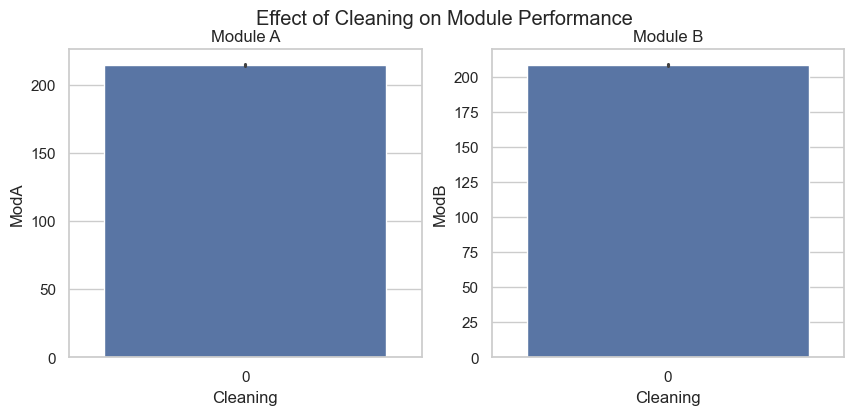

In [6]:
if "Cleaning" in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    sns.barplot(x="Cleaning", y="ModA", data=df_clean, ax=axes[0])
    sns.barplot(x="Cleaning", y="ModB", data=df_clean, ax=axes[1])
    axes[0].set_title("Module A")
    axes[1].set_title("Module B")
    plt.suptitle("Effect of Cleaning on Module Performance")
    plt.show()
else:
    print("⚠️ No 'Cleaning' column found in dataset.")


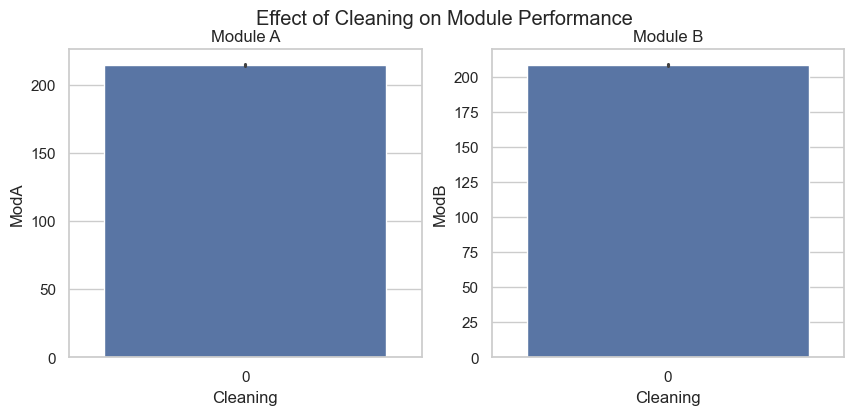

In [7]:
if "Cleaning" in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    sns.barplot(x="Cleaning", y="ModA", data=df_clean, ax=axes[0])
    sns.barplot(x="Cleaning", y="ModB", data=df_clean, ax=axes[1])
    axes[0].set_title("Module A")
    axes[1].set_title("Module B")
    plt.suptitle("Effect of Cleaning on Module Performance")
    plt.show()
else:
    print("⚠️ No 'Cleaning' column found in dataset.")


## 🔗 Step 7: Correlation Analysis

We explore the relationship between key solar parameters (GHI, DNI, DHI, module temperatures, humidity, and wind speed).
The correlation heatmap helps identify variables with strong relationships.

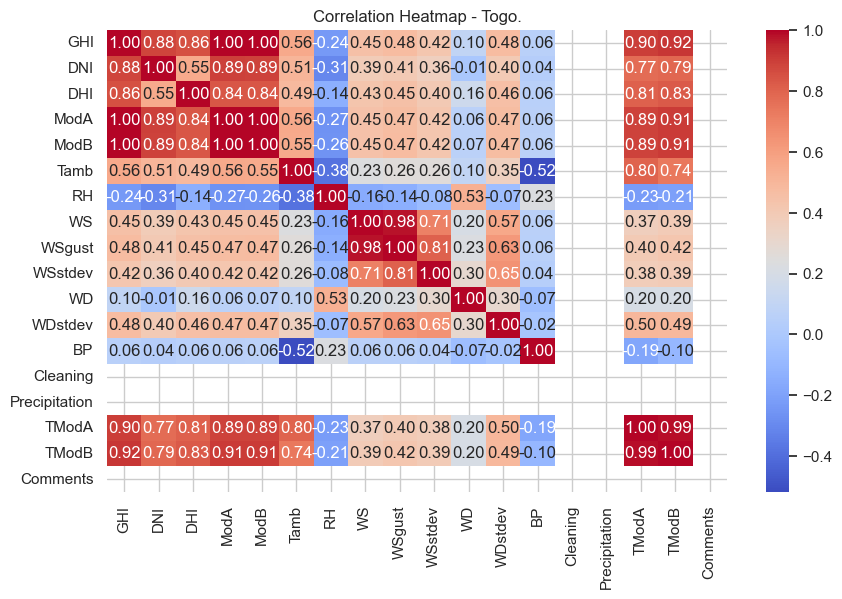

In [8]:
corr = df_clean.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
#sns.heatmap(corr, cmap='coolwarm', annot=False)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap - Togo.")
plt.show()

## 🌬️ Step 8: Wind and Distribution Analysis

We visualize the distribution of wind speeds to assess wind variability and potential effects on solar equipment.

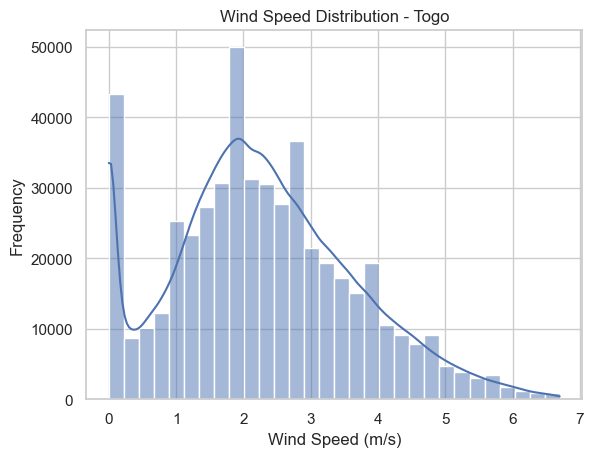

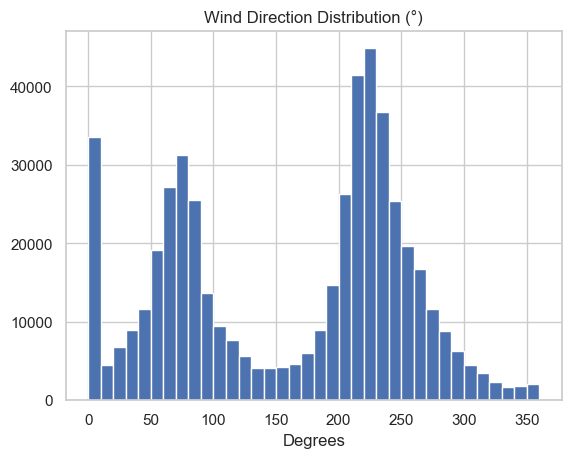

In [9]:
sns.histplot(df_clean["WS"], bins=30, kde=True)
plt.title("Wind Speed Distribution - Togo")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

if "WD" in df_clean.columns:
    df_clean["WD"].hist(bins=36)
    plt.title("Wind Direction Distribution (°)")
    plt.xlabel("Degrees")
    plt.show()
else:
    print("⚠️ No 'WD' column found in dataset.")

## 🌡️ Step 9: Temperature and Humidity Relationship

We analyze how ambient temperature and relative humidity interact with solar radiation.
Higher humidity may reduce solar intensity, while higher temperature can affect module performance.

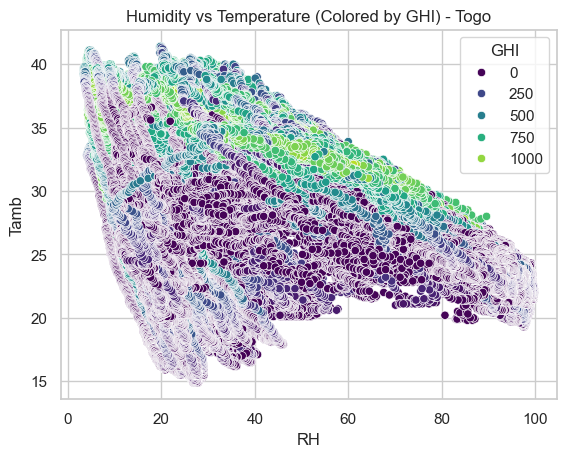

Correlation (Tamb vs GHI): 0.5582415657820929
Correlation (RH vs GHI): -0.2389443177744013


In [10]:
sns.scatterplot(x="RH", y="Tamb", hue="GHI", data=df_clean, palette="viridis")
plt.title("Humidity vs Temperature (Colored by GHI) - Togo")
plt.show()

print("Correlation (Tamb vs GHI):", df_clean['Tamb'].corr(df_clean['GHI']))
print("Correlation (RH vs GHI):", df_clean['RH'].corr(df_clean['GHI']))

## 💾 Step 10: Export Cleaned Data

Finally, we export the cleaned dataset for Togo.  
This file will be used later in the **Cross-Country Comparison** analysis.

In [11]:
os.makedirs("../data/clean", exist_ok=True)
df_clean.to_csv("../data/clean/Togo-malanville-clean.csv", index=False)
print("✅ data/clean/togo-dapaong_qc-clean.csv")


✅ data/clean/togo-dapaong_qc-clean.csv
